# - Linear Regression with statsmodels and scikit-learn
#  - Ridge, Lasso, and Elastic net regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')
from pandas_datareader import data
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
import plotly
import plotly.graph_objects as go
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
df=pd.read_csv("/Users/USER/Documents/DATASETS/insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
num=df.select_dtypes(include='number')
cat=df.select_dtypes(include='O')

AGE



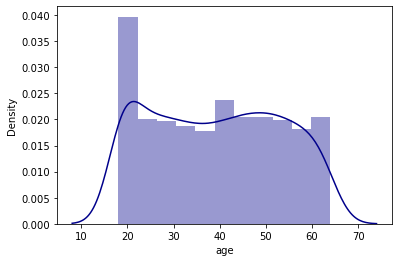

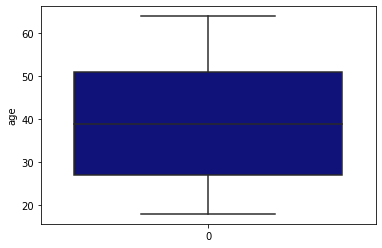

**************************************************************************

BMI



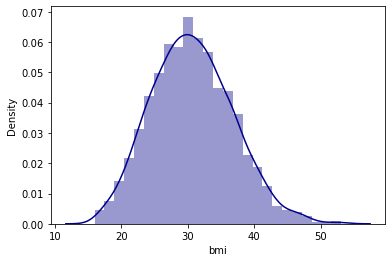

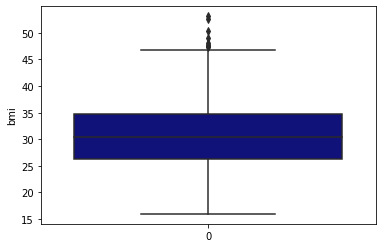

**************************************************************************

CHILDREN



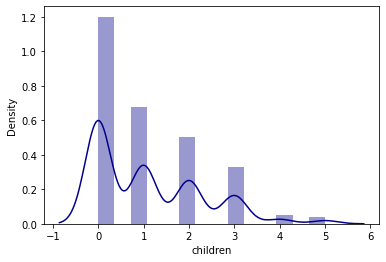

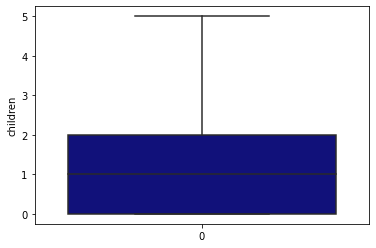

**************************************************************************

CHARGES



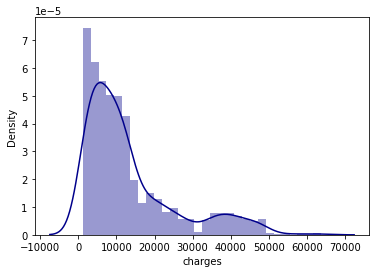

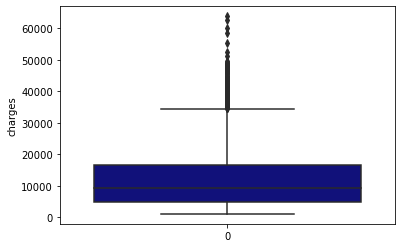

**************************************************************************



In [6]:
for i in num:
    plt.figure()
    print(i.upper())
    print()
    sns.distplot(df[i],color='darkblue')
    plt.show()
    print()
    sns.boxplot(df[i],color='darkblue')
    plt.ylabel(i)
    plt.show()
    print('**************************************************************************')
    print()


In [7]:
for i in num:
    print(i.upper())
    print('Skewness',df[i].skew())
    print('Kurtosis',df[i].kurt())
    Mean=round(df[i].mean(),2)
    Median=round(df[i].median(),2)
    print('Mean',Mean)
    print('Median',Median)
    if Mean>Median:
        print('Right Skewed')
    else:
        print('Left Skewed')
    print('*****************************************************************************')
    print()

AGE
Skewness 0.05567251565299186
Kurtosis -1.2450876526418673
Mean 39.21
Median 39.0
Right Skewed
*****************************************************************************

BMI
Skewness 0.2840471105987448
Kurtosis -0.05073153135467834
Mean 30.66
Median 30.4
Right Skewed
*****************************************************************************

CHILDREN
Skewness 0.9383804401702414
Kurtosis 0.2024541467168901
Mean 1.09
Median 1.0
Right Skewed
*****************************************************************************

CHARGES
Skewness 1.5158796580240388
Kurtosis 1.6062986532967907
Mean 13270.42
Median 9382.03
Right Skewed
*****************************************************************************



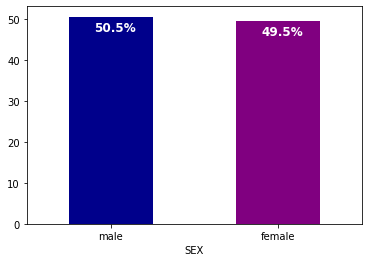

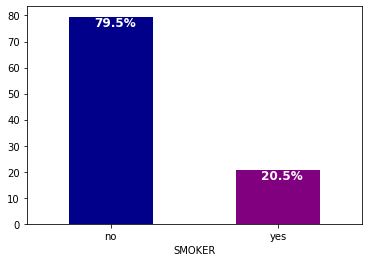

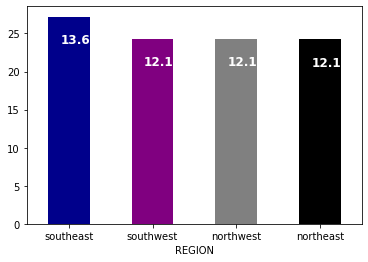

In [8]:
for i in cat:
    plt.figure()
    ax=(df[i].value_counts()*100/len(df)).plot(kind='bar',stacked=True,rot=0,color=['darkblue','purple','grey','k'])
    ax.set_xlabel(i.upper())
    
    
    totals=[]
    for i in ax.patches:
        totals.append(i.get_width())
    total=sum(totals)
    
    for i in ax.patches:
        ax.text(i.get_x()+0.15,i.get_height()-3.5,\
               str(round((i.get_height()/total),1))+'%',
               fontsize=12,
               color='white',
               weight='bold')

In [9]:
for i in cat:
    print(i,df[i].mode())
    print()

sex 0    male
dtype: object

smoker 0    no
dtype: object

region 0    southeast
dtype: object



In [10]:
np.where(df['children']<0)

(array([], dtype=int64),)

In [11]:
#checking for empty strings
for i in df:
    g=df.loc[df[i].apply(lambda x:x==' ')]
    print(g)
    print()

Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []

Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []

Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []

Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []

Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []

Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []

Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []



In [12]:
#checking for duplicates
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [13]:
df.drop_duplicates(inplace=True)

<AxesSubplot:>

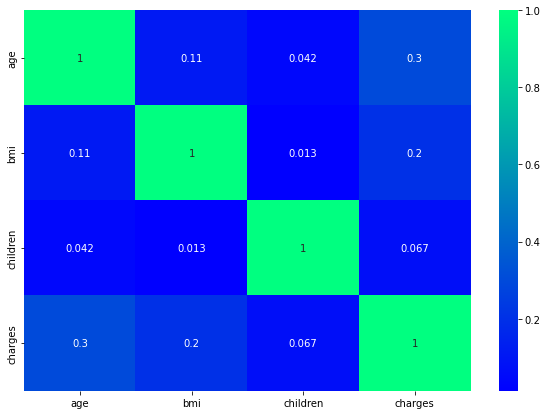

In [14]:
#correlation
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,cmap='winter')

In [15]:
df.corrwith(df['charges'])

age         0.298308
bmi         0.198401
children    0.067389
charges     1.000000
dtype: float64

In [16]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [17]:
#dealing with categorical data
df_dummies=pd.get_dummies(df,drop_first=True)
df_dummies.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


### SPLIT DATA

In [18]:
x=df_dummies.drop(['charges'],axis=1)
y=df_dummies['charges']

In [19]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=12)

In [20]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((1069, 8), (268, 8), (1069,), (268,))

# Checking OLS assumptions

**1. Linearity**

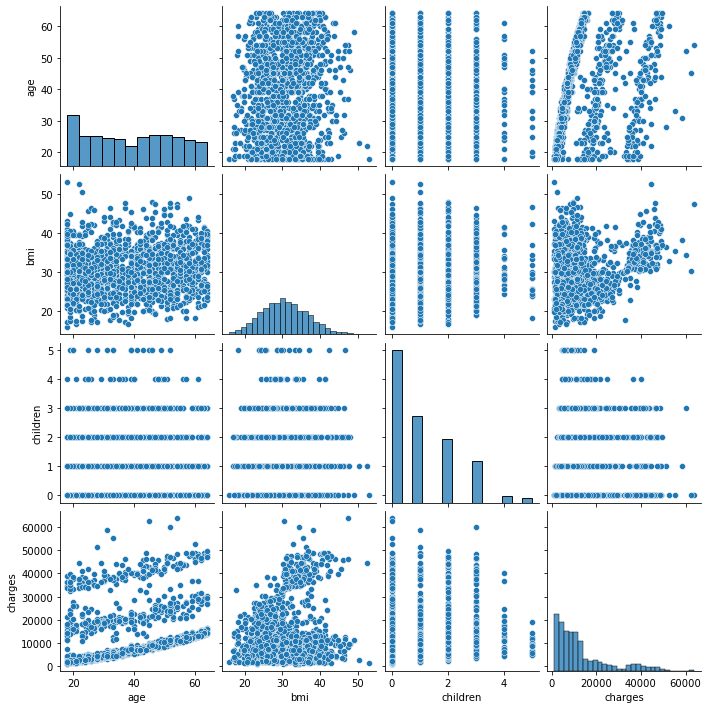

In [21]:
sns.pairplot(df)

**2. Normality**

In [22]:
#test for normality with Shapiro-Wilk test
#Ho: The data is normally distributed
from scipy.stats import shapiro

In [23]:
for i in num:
    print(i.upper())
    pvalue=stats.shapiro(df[i])[1]
    if pvalue<0.05:
        print('Null hypothesis rejected. Data is not normal')
    else:
        print('Null hypothesis accepted. Data is normal')
    print()

AGE


<IPython.core.display.Javascript object>

Null hypothesis rejected. Data is not normal

BMI


<IPython.core.display.Javascript object>

Null hypothesis rejected. Data is not normal

CHILDREN


<IPython.core.display.Javascript object>

Null hypothesis rejected. Data is not normal

CHARGES


<IPython.core.display.Javascript object>

Null hypothesis rejected. Data is not normal



**3. Multicollinearity**

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [25]:
variables=df[['age','bmi','children','charges']]

In [26]:
vif=pd.DataFrame()

In [27]:
vif['VIF']=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]

vif['Feature']=variables.columns

In [28]:
vif

,VIF,Feature
0,8.102351,age
1,8.056432,bmi
2,1.800697,children
3,2.474252,charges


## Linear Regrssion with statsmodels

In [29]:
x=sm.add_constant(xtrain)

results=sm.OLS(ytrain,x).fit()

In [30]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     404.8
Date:                Mon, 19 Dec 2022   Prob (F-statistic):          6.46e-316
Time:                        07:27:51   Log-Likelihood:                -10786.
No. Observations:                1069   AIC:                         2.159e+04
Df Residuals:                    1060   BIC:                         2.164e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.147e+04   1060.158    -10.816      0.000   -1.35e+04   -9386.230
age                262.1840     12.717     20.617      0.000     237.230     287.138
bmi                309.7915     30.997      9.994      0.000     248.969     370.614
children           470.6585    150.787      3.121      0.002     174.783     766.534
sex_male          -130.3053    360.057     -0.362      0.717    -836.811     576.201
smoker_yes        2.344e+04    451.962     51.873      0.000    2.26e+04    2.43e+04
region_northwest  -426.1119    515.935     -0.826      0.409   -1438.481     586.257
region_southeast  -510.1249    521.911     -0.977      0.329   -1534.221     513.971
region_southwest  -407.0204    517.624     -0.786      0.432   -1422.704     608.664
==============================================================================
Omnibus:                      230.986   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              515.389
Skew:                           1.187   Prob(JB):                    1.22e-112
Kurtosis:                       5.435   Cond. No.                         309.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
xtest_copy=xtest.copy()
xtest_copy['const']=1

cols=['const','age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest',
       'region_southeast', 'region_southwest',]

xtest_copy=xtest_copy[cols]
stats_pred=results.predict(xtest_copy)

In [32]:
stats_pred

937      8190.578658
729     10420.877548
1307    30405.712961
925     12401.139442
137      1544.154734
            ...     
224     29982.831497
1245     5218.575346
1087    12692.417247
913      8652.523099
534     17213.228083
Length: 268, dtype: float64

In [33]:
stats=pd.DataFrame(ytest)
stats['Predicted']=stats_pred

stats['Residuals']=stats['charges'] - stats['Predicted']

stats['Diff_in_%']=abs((stats['Residuals']/stats['charges'])*100)


#to view all data
pd.options.display.max_rows=1000
stats.sort_values(by='Diff_in_%')

,charges,Predicted,Residuals,Diff_in_%
466,13224.69300,13219.216763,5.476237,0.041409
789,13457.96080,13547.767373,-89.806573,0.667312
771,11150.78000,11235.004391,-84.224391,0.755323
625,3736.46470,3774.619672,-38.154972,1.021152
914,5257.50795,5192.914586,64.593364,1.228593
341,13352.09980,13532.454168,-180.354368,1.350757
1185,8603.82340,8441.502349,162.321051,1.886615
1154,11015.17470,11227.353485,-212.178785,1.926241
106,2331.51900,2376.735598,-45.216598,1.939362
1107,10493.94580,10280.660978,213.284822,2.032456


## Linear regression with scikit-learn

In [34]:
lin_reg=LinearRegression()

In [35]:
#baseline model

ymean=ytrain.mean()
ybase=[ymean] * len(ytrain)

base_mae=mean_absolute_error(ybase,ytrain)
base_mae

8809.301771738516

In [104]:
def regression_model(model):
    
    model.fit(xtrain,ytrain)
    
    train_pred=model.predict(xtrain)
    
    r2_score=model.score(xtrain,ytrain)
    
    mae=mean_absolute_error(train_pred,ytrain)
    
    mse=mean_squared_error(ytrain,train_pred)
    
    root_mean_squared_error=np.sqrt(mse)
    
    normalised_rmse=root_mean_squared_error/(ytrain.max()- ytrain.min())
    
    n=xtrain.shape[0]
    p=xtrain.shape[1]
    adjusted_r2 = 1 - (1-r2_score) *(n-1)/(n-p-1)
    
    
    
    
    #test data
    test_pred=model.predict(xtest)
    
    test_r2_score=model.score(xtest,ytest)
    
    test_mae=mean_absolute_error(test_pred,ytest)
    
    test_mse=mean_squared_error(ytest,test_pred)
    
    test_root_mean_squared_error=np.sqrt(test_mse)
    
    test_normalised_rmse=test_root_mean_squared_error/(ytest.max()- ytest.min())
    
    n=xtest.shape[0]
    p=xtest.shape[1]
    test_adjusted_r2 = 1 - (1-test_r2_score) *(n-1)/(n-p-1)
    
        
    print('Train_Mean_absolute_error','---',mae)
    print('Train_R2_score','---',r2_score)
    print('Train_Mean_squared_error','---',mse)
    print('Train_Root_mean_squared_error','---',root_mean_squared_error)
    print('Train_Adjusted_r2','---',adjusted_r2)
    print('Train_Normalised_rmse','---',normalised_rmse)
    print()
    print()
    
    print('Test_Mean_absolute_error','---',test_mae)
    print('Test_R2_score','---',test_r2_score)
    print('Test_Mean_squared_error','---',test_mse)
    print('Test_Root_mean_squared_error','---',test_root_mean_squared_error)
    print('Test_Adjusted_r2','---',test_adjusted_r2)
    print('Test_Normalised_rmse','---',test_normalised_rmse)
    
    sns.kdeplot(ytest-test_pred,color='darkblue',shade=True)
    plt.title('Residual Plot')
    plt.xlabel('Predicted-Actual')
    plt.show()
    
    sns.regplot(x=test_pred,y=ytest)
    plt.title('Residual Plot')
    plt.xlabel('Predicted')
    plt.ylabel('Actual values')
    plt.show();
    
    
def regression_weights(model):
    model.fit(xtrain,ytrain)
    
    coefficients=model.coef_
    
    intercept=model.intercept_
    
    return coefficients,intercept


In [105]:
coef,intercept=regression_weights(lin_reg)
coef,intercept

(array([  262.18399321,   309.79147692,   470.65853409,  -130.30527227,
        23444.74825828,  -426.1119376 ,  -510.1248575 ,  -407.02041364]),
 -11466.476337989507)

Train_Mean_absolute_error --- 4033.072370507839
Train_R2_score --- 0.7533757142363804
Train_Mean_squared_error --- 34014197.96910071
Train_Root_mean_squared_error --- 5832.169233578593
Train_Adjusted_r2 --- 0.7515143988721267
Train_Normalised_rmse --- 0.09309343713405284


Test_Mean_absolute_error --- 4677.733000211806
Test_R2_score --- 0.7368093088415684
Test_Mean_squared_error --- 47165037.12122704
Test_Root_mean_squared_error --- 6867.680621667481
Test_Adjusted_r2 --- 0.7286798666436245
Test_Normalised_rmse --- 0.11175063937152495


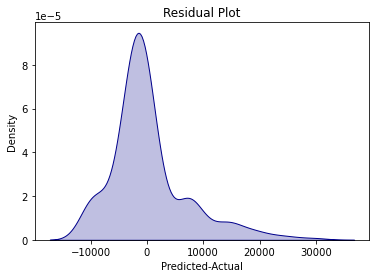

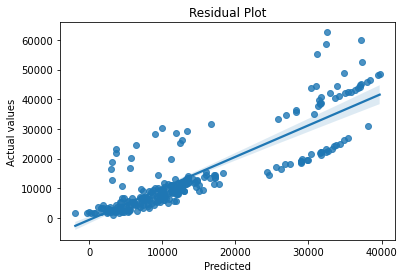

In [106]:
train_linear_regression=regression_model(lin_reg)
train_linear_regression

In [107]:
#feature selection through f.regression
from sklearn.feature_selection import f_regression

f_statistic,p_values=f_regression(xtrain,ytrain)

In [108]:
#creating a summary table
train_summary_table=pd.DataFrame(data=xtrain.columns.values,columns=['Features'])
train_summary_table['Coefficients']=coef
train_summary_table['Intercept']=intercept
train_summary_table['Pvalues']=p_values.round(4)

train_summary_table

,Features,Coefficients,Intercept,Pvalues
0,age,262.183993,-11466.476338,0.0000
1,bmi,309.791477,-11466.476338,0.0000
2,children,470.658534,-11466.476338,0.0041
3,sex_male,-130.305272,-11466.476338,0.0717
4,smoker_yes,23444.748258,-11466.476338,0.0000
5,region_northwest,-426.111938,-11466.476338,0.3165
6,region_southeast,-510.124857,-11466.476338,0.0400
7,region_southwest,-407.020414,-11466.476338,0.2904


## Linear Regression pipeline

In [109]:
x=df.drop(['charges'],axis=1)
y=df['charges']

xtrain_n,xtest_n,ytrain_n,ytest_n=train_test_split(x,y,test_size=0.2,random_state=12)

In [110]:
w=xtrain_n.copy()
w[:2]

,age,sex,bmi,children,smoker,region
161,18,female,36.850,0,yes,southeast
1033,18,male,21.565,0,yes,northeast


In [111]:
from sklearn.base import BaseEstimator, TransformerMixin
sex_ix, smoker_ix, region_ix= 1,4,5
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, change_values = True): # no *args or **kwargs
        self.change_values = change_values 
    def fit(self, X, y=None):
        return self # nothing else to do 
    def transform(self, X, y=None):
        if self.change_values:
            sex_transformed =    pd.get_dummies(X[:, sex_ix],drop_first=True)
            smoker_transformed = pd.get_dummies(X[:, smoker_ix],drop_first=True)
            region_transformed = pd.get_dummies(X[:, region_ix],drop_first=True)
            df=np.delete(X,[sex_ix, smoker_ix, region_ix],axis=1)
            return np.c_[df, sex_transformed, smoker_transformed,region_transformed]
        else:
            return None
        
    

In [112]:
attr_adder = CombinedAttributesAdder(change_values = True)
column_extra_attribs = attr_adder.transform(w.values)

In [113]:
pd.DataFrame(column_extra_attribs)

,0,1,2,3,4,5,6,7
0,18,36.85,0,0,1,0,1,0
1,18,21.565,0,1,1,0,0,0
2,48,29.7,0,1,0,0,1,0
3,22,34.58,2,0,0,0,0,0
4,19,21.7,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...
1064,59,31.79,2,1,0,0,1,0
1065,42,26.9,0,1,0,0,0,1
1066,61,36.3,1,1,1,0,0,1
1067,55,30.5,0,0,0,0,0,1


In [114]:
from sklearn.pipeline import Pipeline,make_pipeline

In [115]:
lr_pipeline=make_pipeline(CombinedAttributesAdder(change_values = True),LinearRegression())
lr_pipeline.fit(xtrain_n.values,ytrain_n.values)

Pipeline(steps=[('combinedattributesadder', CombinedAttributesAdder()),
                ('linearregression', LinearRegression())])

In [116]:
pred=lr_pipeline.predict(xtest_n.values)

## RIDGE REGRESSION

In [117]:
ridge=Ridge()

parameters={'alpha':[1e-15,1e-8,1e-3,1e-2,1,3,5,7,9]}

ridge_regressor=GridSearchCV(ridge,parameters,scoring='r2',cv=5)

Train_Mean_absolute_error --- 4043.17769800122
Train_R2_score --- 0.753353712698162
Train_Mean_squared_error --- 34017232.40131111
Train_Root_mean_squared_error --- 5832.429373881102
Train_Adjusted_r2 --- 0.7514922312845632
Train_Normalised_rmse --- 0.09309758950925455


Test_Mean_absolute_error --- 4690.10814066633
Test_R2_score --- 0.7362809036539035
Test_Mean_squared_error --- 47259729.87111711
Test_Root_mean_squared_error --- 6874.571249984766
Test_Adjusted_r2 --- 0.7281351400602016
Test_Normalised_rmse --- 0.11186276341493177


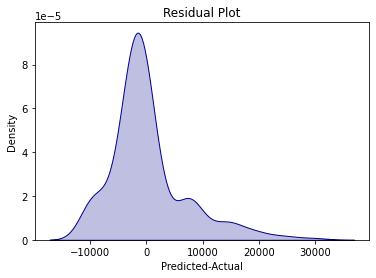

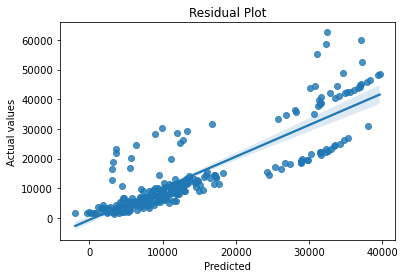

In [118]:
ridge_reg=regression_model(ridge_regressor)
ridge_reg

In [119]:
ridge_regressor.best_params_,ridge_regressor.best_score_

({'alpha': 1}, 0.7292556143203645)

### LASSO REGRESSION

In [125]:
lasso=Lasso()

parameters=({'alpha':[1e-15,1e-8,1e-3,1e-2,1,3,5,7,9,20,40,45,55,100]})

lasso_regressor=GridSearchCV(lasso,parameters,scoring='r2',cv=5)

Train_Mean_absolute_error --- 4083.4808076295785
Train_R2_score --- 0.7525785847078641
Train_Mean_squared_error --- 34124137.351209894
Train_Root_mean_squared_error --- 5841.586886387114
Train_Adjusted_r2 --- 0.7507112532716971
Train_Normalised_rmse --- 0.09324376227630568


Test_Mean_absolute_error --- 4733.751421633802
Test_R2_score --- 0.732265982414207
Test_Mean_squared_error --- 47979223.05864439
Test_Root_mean_squared_error --- 6926.70362139484
Test_Adjusted_r2 --- 0.7239962058092405
Test_Normalised_rmse --- 0.11271105939110883


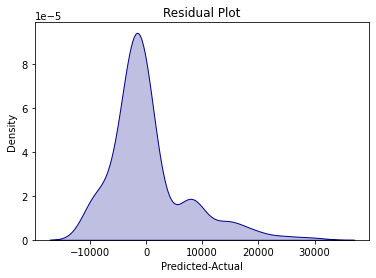

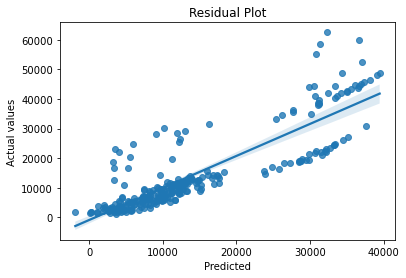

In [126]:
lasso_reg=regression_model(lasso_regressor)

In [127]:
lasso_regressor.best_params_,lasso_regressor.best_score_

({'alpha': 100}, 0.7324676695609514)

### ELASTIC NET REGRESSION

In [124]:
elastic_net=ElasticNet()

parameters=({'alpha':[1e-15,1e-8,1e-3,1e-2,1,3,5,7,9,20,40,45,55,100]})

enet_regressor=GridSearchCV(elastic_net,parameters,scoring='r2',cv=5)

<IPython.core.display.Javascript object>

Train_Mean_absolute_error --- 4038.465737290927
Train_R2_score --- 0.7533693929144794
Train_Mean_squared_error --- 34015069.80008809
Train_Root_mean_squared_error --- 5832.243976385769
Train_Adjusted_r2 --- 0.7515080298421357
Train_Normalised_rmse --- 0.09309463018324987


Test_Mean_absolute_error --- 4684.346933865072
Test_R2_score --- 0.7365307594734452
Test_Mean_squared_error --- 47214954.50709581
Test_Root_mean_squared_error --- 6871.313885065636
Test_Adjusted_r2 --- 0.7283927134340149
Test_Normalised_rmse --- 0.11180975969614632


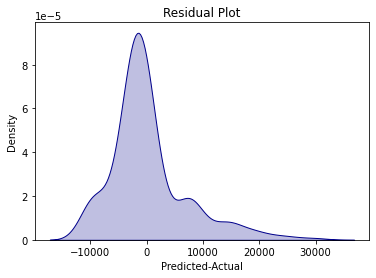

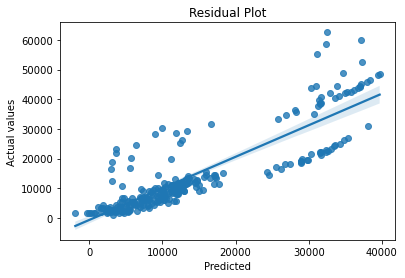

In [128]:
enet_reg=regression_model(enet_regressor)

In [130]:
enet_regressor.best_params_,enet_regressor.best_score_

({'alpha': 0.001}, 0.7292421271359688)